Intro to Scientific Programming, developed by Lily N. Zhang (lilynzhang.com/teaching/)

## Lesson Two

# Arrays

Today we'll be learning about **arrays**, which are essential to scientific computing. Arrays are data structures that store items (typically) of the same data type. For example, this array stores integers: 

In [7]:
int_array = [1, 2, 3, 4, 5]
print(int_array)

[1, 2, 3, 4, 5]


and this array can store strings:

In [8]:
greet_array = ["hi", "hola", "nihao"]
print(greet_array)

['hi', 'hola', 'nihao']


(As a reminder, strings are sequences of characters that represent text; they're enclosed in quotes to distinguish them from other types of data.)

## Array Indexing

The items stored within arrays are called its **elements**. The location of an element within the array is called its **index**. Python uses zero-based indexing, which means we start counting from 0. For example, returning to `greetings_array` above, the string `"hi"` is the first element; that means its index is 0.

To extract a given element from an array, we use brackets `[]` like so:

In [10]:
greet_array[0]

'hi'

If we want to extract multiple elements, we can use the colon `:` to go from index 1 ≤ i < index 2:

In [12]:
greet_array[0:2]

['hi', 'hola']

(Note that the output does not include index = 2; also note that we typically use `i` as the variable name for indices.)

We can also get the length of an array using `len()`:

In [15]:
len(greet_array)

3

## Example 1: Time Series Plot

A 1-D array you often see in atmospheric science is a time series. For example, a 1 x 12 array where each element represents the average daily high temperatuer for each month. Here is the data for Seattle: https://weatherspark.com/y/913/Average-Weather-in-Seattle-Washington-United-States-Year-Round

In [16]:
monthlyT_sea = [48, 51, 55, 60, 66, 72, 77, 77, 71, 61, 52, 47]

In this case, the indices represent the month. So, if we want the average daily high temperature from May, we take:

In [17]:
monthlyT_sea[4]

66

One of the most useful functions we can use on arrays is **plotting**. To do this, we are going to import the **matploblib** library and use the `plot()` function:

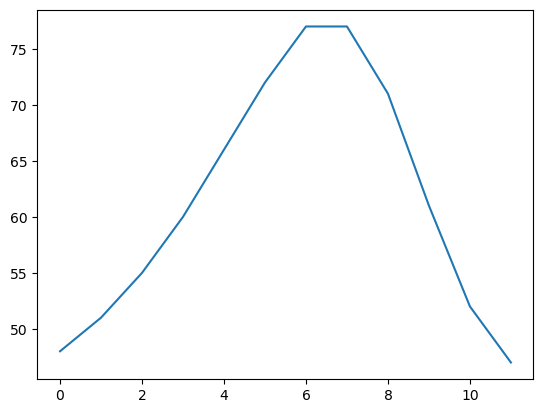

In [18]:
import matplotlib.pyplot as plt
plt.plot(monthlyT_sea)

Cool, right? Later on, we'll learn how to make this look nicer.

## NumPy Arrays

A small confession: in the previous sections, we weren't actually using arrays but Python's built-in "Lists" as an introduction. Now, we're going to import the NumPy library to work with real arrays.

In [2]:
import numpy as np

What do I mean by that? Well real (numpy) arrays have certain useful characteristics that we will explore in the following sections:

### 2-D Arrays

NumPy arrays can have multiple dimensions. A 2-D array has rows and columns and, when filled with numbers, can function like a linear algebra matrix.

In [3]:
A_1D = np.array([1,2,3,4,5,6,7,8,9])
print(A_1D)

[1 2 3 4]


In [5]:
A_2D = np.array([[1,2,3],[4,5,6],[7,8,9]]) # each row is contained within brackets [], add a comma between rows to create new ones
print(A_2D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


To index into a 2_D array, we use the following syntax: `element = array[i,j]`, where `i` is the row index and `j` is the column index. For example, in the previous array, the element 6 is in row 2, column 3.

In [8]:
i = 2-1
j = 3-1
print(A_2D[i,j])

6


Note: remember that Python uses zero-based indexing! Also note that getting your i and j mixed up will pull a different element.

Why is this useful? Let's say we have a 2-D array filled with average May temperature, where the rows are the latitude and the columns are the longitude. Then, we can easily find the temperature at a given location by indexing into the array at `[lat_i,lon_i]`

### Multi-Dimensional Arrays

An array can have as many dimensions as we want it to have. For example, a common 3-D array that we might encounter in atmospheric sciences gives some variable at each latitude, longitude, and time. That means the dimensions of the array are lat x lon x time. For example, a 180 x 360 x 12 sized array called `Tmon_glob` that provides the monthly temperature for each grid point on the globe.

In [10]:
Tmon_glob = np.ones((180,360,12)) # here I'm creating an array filled with ones as an example. You can also do this for zeros and nans (empty value placeholder)

If we wanted the average May temperature for one grid point, we would use the following syntax:

`T[lat_i,lon_i,4]`

If we wanted the entire annual cycle (all 12 monthly temperatures) for one location, we could retrieve all the elements in the time index by putting a colon `:`

`T[lat_i,lon_i,:]`

This would return a 1 x 1 x 12 array (like the time series in Example 1).

#### Exercises for Understanding Multi-Dimensional Arrays

1. What would `T[lat_i,lon_i,7:9]` return? A: the June, July, August monthly temperatures at a location
2. What would `T[:,lon_i,12]` return? A: the December temperatures for every latitude along a longitude band. Bonus: what would this look like? A: Colder near the beginngin and end (poles)

#### Variables as a Dimension

Another common dimension is variable. If an array contains multiple variables, for example: `hourlymet_glob` global hourly temperature, precipitation, and wind speed, then the dataset may have temperature assigned to be the first index (i=0), precipitation as the second (i=1), and wind as i=2. In this case, to access temperature, we would call:

`hourlymet_glob[lat_i,lon_i,:,0]`

### Useful Array Functions

#### Statistics

We can take the **mean** of an array using `np.mean()`:

In [11]:
a = np.array([1, 2, 3, 4, 5, 6])
print(np.mean(a))

3.5


A very useful numpy function is the ability to take the mean along a specified axis for multi-dimensional arrays. For example, returning to our 2D array from earlier:

In [12]:
print(A_2D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


We can find the mean for each column by noting that the column is the second index, so its axis is 1 in Python.

In [13]:
column_mean = np.mean(A_2D,axis=1)
print(column_mean)

[2. 5. 8.]


We can take the **median**, **std** (standard deviation), etc of an array in similar fashion.

#### NaN

Sometimes the dataset you download will have NaN values, which is generally a placeholder for bad (or no) data. IN that case, you will have to be careful to ignore the NaN values when taking the mean, or else the following will happen:

In [14]:
a_nans = [1, 2, 3, 4, np.nan, 5, 6]
print(np.mean(a_nans))

nan


Luckily, Python has a handy function for this: `np.nanmean()`

In [15]:
print(np.nanmean(a_nans))

3.5


## Conclusion

Arrays allows us to store data, which then we can plot and analyze through indexing and other methods. In Python, we work with arrays using the NumPy library.